<a href="https://colab.research.google.com/github/BrenoMilagres/DataScienceProjetos/blob/master/modeloPreditivoCampBrasileiroTemp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
#importando os dados para o google colab
from google.colab import files
uploaded = files.upload()

Saving campeonato-brasileiro-full.csv to campeonato-brasileiro-full.csv


In [8]:
times = pd.read_csv('campeonato-brasileiro-full.csv')

In [9]:
times.head()

,Horário,Dia,Data,Clube 1,Clube 2,Vencedor,Rodada,Arena,Clube 1 Gols,Clube 2 Gols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [10]:
times.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Horário                7582 non-null   object
 1   Dia                    7939 non-null   object
 2   Data                   7939 non-null   object
 3   Clube 1                7939 non-null   object
 4   Clube 2                7939 non-null   object
 5   Vencedor               7939 non-null   object
 6   Rodada                 7939 non-null   object
 7   Arena                  7939 non-null   object
 8   Clube 1 Gols           7939 non-null   int64 
 9   Clube 2 Gols           7939 non-null   int64 
 10  Clube 1 Estado         7939 non-null   object
 11  Clube 2 Estado         7939 non-null   object
 12  Estado Clube Vencedor  7939 non-null   object
dtypes: int64(2), object(11)
memory usage: 806.4+ KB


#### Renomeando colunas

In [11]:
times = times.rename(columns={'Clube 1':'Mandante','Clube 2':'Visitante','Clube 1 Gols':'MandanteGols','Clube 2 Gols':'VisitanteGols'})
times.head()

,Horário,Dia,Data,Mandante,Visitante,Vencedor,Rodada,Arena,MandanteGols,VisitanteGols,Clube 1 Estado,Clube 2 Estado,Estado Clube Vencedor
0,16h00,Sábado,2000-07-29,Fluminense,Bahia,Fluminense,1ª Rodada,Maracanã,2,0,RJ,BA,RJ
1,16h00,Sábado,2000-07-29,Vasco,Sport,Sport,1ª Rodada,São Januário,0,2,RJ,PE,PE
2,16h00,Sábado,2000-07-29,Vitória,Palmeiras,Vitória,1ª Rodada,Barradão,4,1,ES,SP,ES
3,17h00,Domingo,2000-07-30,Botafogo-RJ,Atlético-MG,-,1ª Rodada,Caio Martins,0,0,RJ,MG,Empate
4,18h30,Domingo,2000-07-30,Juventude,Flamengo,-,1ª Rodada,Alfredo Jaconi,1,1,RS,RJ,Empate


In [12]:
times.describe()

,MandanteGols,VisitanteGols
count,7939.000000,7939.000000
mean,1.596801,1.052526
std,1.251372,1.039719
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,7.000000,7.000000


#### Definindo colunas interessantes ao modelo

In [87]:
entradas = ['Data','Mandante','Visitante','MandanteGols','VisitanteGols','Vencedor','Rodada']
df_entradas = times[entradas]

#### Transformando a coluna Data para datetime e criando uma coluna apenas com o ano 

In [88]:
df_entradas['Data']= pd.to_datetime(df_entradas['Data'],format='%Y/%m/%d')
df_entradas['Ano'] = df_entradas['Data'].dt.year
df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7939 entries, 0 to 7938
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Data           7939 non-null   datetime64[ns]
 1   Mandante       7939 non-null   object        
 2   Visitante      7939 non-null   object        
 3   MandanteGols   7939 non-null   int64         
 4   VisitanteGols  7939 non-null   int64         
 5   Vencedor       7939 non-null   object        
 6   Rodada         7939 non-null   object        
 7   Ano            7939 non-null   int64         
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 496.3+ KB


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Obtendo a média de gols feitos e sofridos por temporada 

In [89]:
avgMandanteTemporada = df_entradas.groupby(['Mandante','Ano'])['MandanteGols'].mean().reset_index()
avgVisitanteTemporada = df_entradas.groupby(['Visitante','Ano'])['VisitanteGols'].mean().reset_index()

avgMandanteTemporada = avgMandanteTemporada.rename(columns={'MandanteGols':'avgGFMandante'})
avgVisitanteTemporada = avgVisitanteTemporada.rename(columns={'VisitanteGols':'avgGFVisitante'})


print(avgMandanteTemporada)
print(avgVisitanteTemporada)

       Mandante   Ano  avgGFMandante
0    América-MG  2000       1.500000
1    América-MG  2001       1.214286
2    América-MG  2011       1.736842
3    América-MG  2016       0.684211
4    América-MG  2018       1.157895
..          ...   ...            ...
449     Vitória  2013       1.684211
450     Vitória  2014       1.210526
451     Vitória  2016       1.578947
452     Vitória  2017       1.157895
453     Vitória  2018       1.157895

[454 rows x 3 columns]
      Visitante   Ano  avgGFVisitante
0    América-MG  2000        0.666667
1    América-MG  2001        1.153846
2    América-MG  2011        0.947368
3    América-MG  2016        0.526316
4    América-MG  2018        0.421053
..          ...   ...             ...
452     Vitória  2014        0.736842
453     Vitória  2016        1.105263
454     Vitória  2017        1.473684
455     Vitória  2018        0.736842
456  portuguesa  2001        1.000000

[457 rows x 3 columns]


In [90]:
avgGSMandanteTemporada = df_entradas.groupby(['Ano','Mandante'])['VisitanteGols'].mean().reset_index()
avgGSVisitanteTemporada = df_entradas.groupby(['Ano','Visitante'])['MandanteGols'].mean().reset_index()

avgGSMandanteTemporada = avgGSMandanteTemporada.rename(columns={'VisitanteGols':'avgGSMandante'})
avgGSVisitanteTemporada = avgGSVisitanteTemporada.rename(columns={'MandanteGols':'avgGSVisitante'})


print(avgGSMandanteTemporada)
print(avgGSVisitanteTemporada)

      Ano       Mandante  avgGSMandante
0    2000     América-MG       0.916667
1    2000   Athlético-PR       1.000000
2    2000    Atlético-MG       1.692308
3    2000          BAHIA       3.000000
4    2000          Bahia       1.230769
..    ...            ...            ...
449  2019  Internacional       0.789474
450  2019      Palmeiras       0.684211
451  2019         Santos       0.789474
452  2019      São Paulo       0.631579
453  2019          Vasco       1.157895

[454 rows x 3 columns]
      Ano      Visitante  avgGSVisitante
0    2000     América-MG        2.000000
1    2000   Athlético-PR        1.307692
2    2000    Atlético-MG        1.818182
3    2000          BAHIA        3.000000
4    2000          Bahia        1.363636
..    ...            ...             ...
452  2019  Internacional        1.263158
453  2019      Palmeiras        1.000000
454  2019         Santos        0.947368
455  2019      São Paulo        0.947368
456  2019          Vasco        1.210526

[45

#### Obtendo o Total de vitórias 

In [91]:
nVitoriasMandante = df_entradas.groupby(['Mandante','Ano'])['Vencedor'].nunique().reset_index()
nVitoriasVisitante = df_entradas.groupby(['Visitante','Ano'])['Vencedor'].nunique().reset_index()

nVitoriasMandante = nVitoriasMandante.rename(columns={'Vencedor':'nVitoriasMandante'})
nVitoriasVisitante = nVitoriasVisitante.rename(columns={'Vencedor':'nVitoriasVisitante'})


print(nVitoriasMandante)
print(nVitoriasVisitante)

       Mandante   Ano  nVitoriasMandante
0    América-MG  2000                  4
1    América-MG  2001                  8
2    América-MG  2011                  7
3    América-MG  2016                 11
4    América-MG  2018                  6
..          ...   ...                ...
449     Vitória  2013                  4
450     Vitória  2014                 10
451     Vitória  2016                  9
452     Vitória  2017                 13
453     Vitória  2018                  9

[454 rows x 3 columns]
      Visitante   Ano  nVitoriasVisitante
0    América-MG  2000                  11
1    América-MG  2001                  10
2    América-MG  2011                  14
3    América-MG  2016                  16
4    América-MG  2018                  16
..          ...   ...                 ...
452     Vitória  2014                  14
453     Vitória  2016                  12
454     Vitória  2017                   8
455     Vitória  2018                  14
456  portuguesa  2001 

#### Colocando Variaveis no DataFrame 

In [92]:

df_entradas =pd.merge(avgMandanteTemporada,df_entradas) 
df_entradas =pd.merge (avgVisitanteTemporada,df_entradas) 


df_entradas =pd.merge (avgGSMandanteTemporada,df_entradas)
df_entradas =pd.merge (avgGSVisitanteTemporada,df_entradas)

df_entradas =pd.merge (nVitoriasMandante,df_entradas)
df_entradas =pd.merge (nVitoriasVisitante,df_entradas)
df_entradas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7939 entries, 0 to 7938
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Visitante           7939 non-null   object        
 1   Ano                 7939 non-null   int64         
 2   nVitoriasVisitante  7939 non-null   int64         
 3   Mandante            7939 non-null   object        
 4   nVitoriasMandante   7939 non-null   int64         
 5   avgGSVisitante      7939 non-null   float64       
 6   avgGSMandante       7939 non-null   float64       
 7   avgGFVisitante      7939 non-null   float64       
 8   avgGFMandante       7939 non-null   float64       
 9   Data                7939 non-null   datetime64[ns]
 10  MandanteGols        7939 non-null   int64         
 11  VisitanteGols       7939 non-null   int64         
 12  Vencedor            7939 non-null   object        
 13  Rodada              7939 non-null   object      

#### Criando a variavel total de gols, e redividindo-a em intervalos.(obtendo saída)
> Para Total de gols menor ou igual a 3, {x = 0}

> Para Total de gols maior que 3, {x = 1}

In [93]:

df_entradas['total_gols'] = df_entradas['MandanteGols'] + df_entradas['VisitanteGols']
df_entradas['faixa_degols'] = df_entradas['total_gols'].apply(lambda x: 0 if x<=3 else 1)
df_entradas['faixa_degols'].value_counts()
                                                          

0    5754
1    2185
Name: faixa_degols, dtype: int64

#### Dividindo os dados para entrada 'X' e saída 'y'

In [116]:
X = df_entradas[['avgGFMandante','avgGFVisitante','avgGSMandante','avgGSVisitante','nVitoriasMandante','nVitoriasVisitante']]
y = df_entradas['faixa_degols']

#### Tratando desbalanceamento 

In [117]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X, y = nr.fit_sample(X, y)
np.bincount(y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


array([2185, 2185])

#### Efetuando normalização dos dados

In [118]:
#importando o preprocessamento com o MinMax
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_escaler = sc_X.fit_transform(X)


#### Dividindo dados para treino e teste (Validação cruzada)

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_escaler, y, test_size=0.3, random_state=0)

#### Resultados Para Regressão Logistica 

In [120]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
y_pred = classifier.predict(X_test)

In [122]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
print("Acurácia para a classificação :  ",accuracy_score(y_pred,y_test))
print(cross_val_score(classifier, X_test, y_test,cv=5))

Acurácia para a classificação :   0.6125095347063311
[0.61977186 0.61068702 0.6221374  0.64122137 0.6259542 ]


#### Resultados para KNN

In [123]:
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=5)

In [124]:
clf_KNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [125]:
y_pred_KNN = clf_KNN.predict(X_test)

In [126]:
from sklearn.metrics import accuracy_score
print("Acurácia para a classificação utilizando o KNN:  ",accuracy_score(y_pred_KNN,y_test))
print(cross_val_score(clf_KNN, X_test, y_test,cv=5))

Acurácia para a classificação utilizando o KNN:   0.6071700991609459
[0.61977186 0.61450382 0.55725191 0.61068702 0.63358779]


#### Resultados para Arvore de decisão 

In [127]:
from sklearn.tree import DecisionTreeClassifier

In [128]:
# Cria o objeto de classificação através do 
clf_arvore = DecisionTreeClassifier()

# Realiza o treinamento do classificador
clf_arvore = clf_arvore.fit(X_train,y_train)

#Realiza a previsão de classificaçao 
y_pred_arvore = clf_arvore.predict(X_test)

In [129]:
from sklearn.metrics import classification_report
print("O valor de f1-score para a árvore de decisão é:\n ",classification_report(y_test,y_pred_arvore))
print(cross_val_score(clf_arvore, X_test, y_test,cv=5))

O valor de f1-score para a árvore de decisão é:
                precision    recall  f1-score   support

           0       0.58      0.57      0.58       664
           1       0.57      0.57      0.57       647

    accuracy                           0.57      1311
   macro avg       0.57      0.57      0.57      1311
weighted avg       0.57      0.57      0.57      1311

[0.54372624 0.54198473 0.53816794 0.59160305 0.55725191]


#### Resultados para floresta randomica

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [131]:
#define a floresta randomica
clf_floresta = RandomForestClassifier(max_depth=9, random_state=1,n_estimators=100)
clf_floresta.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [132]:
#Realiza a previsão de classificaçao 
y_pred_floresta = clf_floresta.predict(X_test)

In [133]:
print("O valor de f1-score para a floresta randômica é:\n ",classification_report(y_test,y_pred_floresta))
print(cross_val_score(clf_floresta, X_train, y_train,cv=5))

O valor de f1-score para a floresta randômica é:
                precision    recall  f1-score   support

           0       0.63      0.80      0.71       664
           1       0.72      0.51      0.60       647

    accuracy                           0.66      1311
   macro avg       0.67      0.66      0.65      1311
weighted avg       0.67      0.66      0.65      1311

[0.63398693 0.66176471 0.64705882 0.65849673 0.66121113]


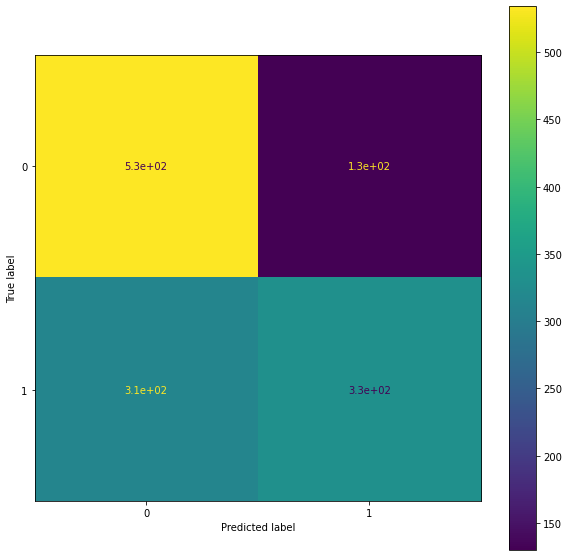

In [134]:
from sklearn.metrics import plot_confusion_matrix
#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(clf_floresta, X_test, y_test)
plt.show()

#### Resultados para MLP

In [135]:
#MLP como classificador
from sklearn.neural_network import MLPClassifier
#define a configuração da rede
clf_mlp = MLPClassifier( alpha=1e-5, hidden_layer_sizes=(5, 5), random_state=1)

#realiza o fit do modelo
clf_mlp.fit(X_train,y_train)


#realiza a previsão
y_pred_mlp=clf_mlp.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [137]:
print("O valor de f1-score para MLP é:\n ",classification_report(y_test,y_pred_mlp))
print(cross_val_score(clf_mlp, X_train, y_train,cv=5))

O valor de f1-score para MLP é:
                precision    recall  f1-score   support

           0       0.65      0.76      0.70       664
           1       0.70      0.58      0.63       647

    accuracy                           0.67      1311
   macro avg       0.67      0.67      0.66      1311
weighted avg       0.67      0.67      0.67      1311



/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[0.64542484 0.64542484 0.64215686 0.62581699 0.63175123]


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


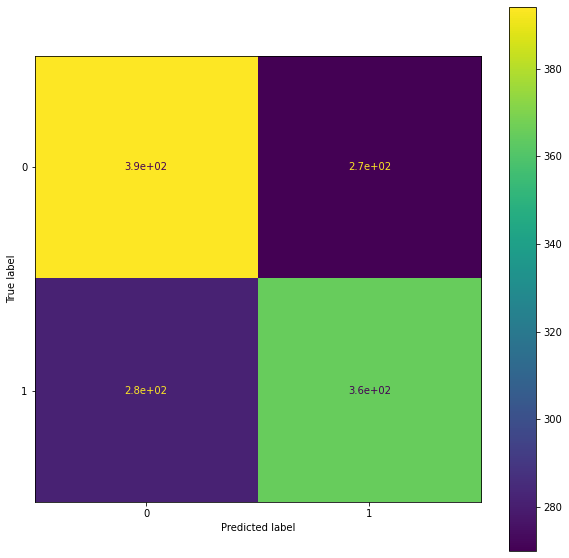

In [115]:

#realiza o plot da matriz de confusão
plt.rcParams["figure.figsize"]=(10, 10)
plot_confusion_matrix(clf_mlp, X_test, y_test)
plt.show()